In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

# Question 1

In [4]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

In [6]:
len(target)

748

# Question 2

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

model = DummyClassifier(strategy='most_frequent')
cv_score = cross_validate(model, data, target, cv=10)


In [10]:
cv_score['test_score'].mean()

0.762054054054054

# Question 3

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, data, target, cv=10, scoring="balanced_accuracy").mean()

0.5

# Question 5

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

modelp = make_pipeline(StandardScaler(), KNeighborsClassifier())
modelp.get_params()


{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

# Question 6

In [21]:
from sklearn.model_selection import cross_validate

modelp.fit(data, target)
pred = modelp.predict(data)
train_error = 1. - (pred == target).mean()

cv_score = cross_validate(modelp, data, target, cv=10)
test_error = (1.-cv_score['test_score']).mean()

train_error, test_error # Training error << Test error

(0.19117647058823528, 0.3472972972972973)

# Question 7, 8, 9

In [23]:
modelp.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [28]:
from sklearn.model_selection import validation_curve
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]

train_acc, test_acc= validation_curve(modelp, data, target, cv=5, param_name="kneighborsclassifier__n_neighbors", param_range=param_range, scoring='balanced_accuracy')

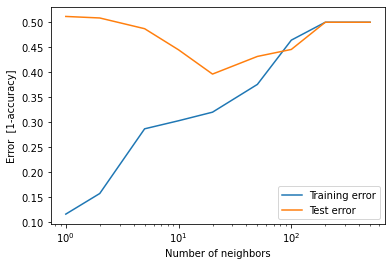

In [38]:
import matplotlib.pyplot as plt
plt.plot(param_range, 1.-train_acc.mean(axis=1), label="Training error")
plt.plot(param_range, 1.-test_acc.mean(axis=1), label="Test error")
plt.xscale('log')
plt.xlabel("Number of neighbors")
plt.ylabel("Error  [1-accuracy]")
plt.legend()